785.000000
831.000000
1160.000000
918.000000
767.000000
803.000000
1134.000000
988.000000
1218.000000
1240.000000
1032.000000
649.000000
1673.000000
1466.000000
1837.000000
1727.000000
1716.000000
1674.000000
1455.000000
1713.000000
3267.000000
2642.000000
2539.000000
2312.000000
2594.000000
2112.000000
2430.000000
3147.000000
3359.000000
3809.000000
4302.000000
3495.000000
2801.000000
4078.000000
3478.000000
3825.000000
4966.000000
4621.000000
4288.000000
4518.000000
5688.000000
6579.000000
6215.000000
7210.000000
6334.000000
6130.000000
6945.000000
8124.000000
8728.000000
9063.000000
10853.000000
8773.000000
8971.000000
10134.000000
8810.000000
13674.000000
12348.000000
13497.000000
12058.000000
11554.000000
10496.000000
12757.000000
13172.000000
13373.000000
13285.000000
13449.000000
9300.000000
8170.000000
13150.000000
13104.000000
13944.000000
12204.000000
11233.000000
7096.000000
7232.000000
11362.000000
11046.000000
11014.000000
10107.000000
8195.000000
5377.000000
4456.000000
8

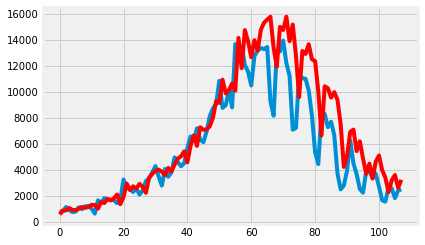

In [7]:
# create and evaluate an updated autoregressive model
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from statsmodels.tsa.ar_model import AutoReg
import sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 




# load dataset
series = pd.read_csv('Covid19Data/South Africa.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame(series)
X = series.values
"""
forecast = model_fit.predict(start=10, end=245,dynamic=True)

pd.set_option('display.max_rows', None)

df = pd.DataFrame({'Predicted': forecast})
#print(df.to_string(index=False))
#print(forecast)
"""
#Here BD has 162 data
#train, test = X[53:size], X[size:len(X)]
#train = X[1:len(X)-100]
#test = X[len(X)-100:]

#X[size:len(X)]
# split dataset

#size=216
train, test = X[68:137],X[137:245]

#X[len(X)-107:]
# train autoregression
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params

#Train
   
#  time steps in train
history = [X for X in train]
#history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(train)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = train[t]
	predictions.append(yhat)
	history.append(obs)   
#	print('%f' % yhat)   
#	print('%f' % obs)
#	print('%f  %f' %(yhat, obs))

window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test


#history = [X for X in train]
history = train[len(train) - window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
#	print('%f' % yhat)
	print('%f' % obs)
  
#RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
rmspe = (np.sqrt(np.mean(np.square((test - predictions) / test )))) * 100
print('RMSPE: ',rmspe)

#print("Final rmse value is =",np.sqrt(np.mean((test-predictions)**2)))

#def rmse(test, predictions):
#    return np.sqrt((( test- predictions) ** 2).mean())
#print(rmse(test, predictions))

#mse = sklearn.metrics.mean_squared_error(test, predictions)

#rmse = math.sqrt(mse)

#print(rmse)

#R
correlation_m = np.corrcoef(test,predictions)
correlation = correlation_m[0,1]
r_value = np.sqrt(correlation**2)

print('R:  ',r_value)


#R-square
correlation_matrix = np.corrcoef(test,predictions)
correlation_xy = correlation_matrix[0,1]
r_square = (correlation_xy**2)*100

print('R-Square:  ',r_square)

#MAPE

def mape(test, predictions): 
    test, predictions = np.array(test), np.array(predictions)
    return np.mean(np.abs((test- predictions) / test))*100

print('MAPE : ',mape(test,predictions))

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()